In [124]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


In [125]:

train_df = pd.read_json("../datasets/train_dataset.json", orient="columns")
test_df = pd.read_json("../datasets/test_dataset.json", orient="columns")
val_df = pd.read_json("../datasets/val_dataset.json", orient="columns")

df = pd.concat([train_df, val_df, test_df], axis=0)
df.head(10)

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2099.0
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,1000.0,producer warranty,"17"" - 17.9""",2699.0
6220,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,[no system],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0
10594,integrated graphics,"[nfc (near field communication), gps]",1920 x 1080,2,8 gb,[windows 10 professional],None,[touchpad],[SD card reader],ddr4,2.5,intel core i5,new,500.0,producer warranty,"15"" - 15.9""",2749.0
11640,integrated graphics,"[wi-fi 802.11 b/g/n/ac, bluetooth, lan 10/100/...",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7853 entries, 7233 to 1371
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       7357 non-null   object 
 1   communications          7071 non-null   object 
 2   resolution (px)         7245 non-null   object 
 3   CPU cores               7853 non-null   object 
 4   RAM size                7403 non-null   object 
 5   operating system        7203 non-null   object 
 6   drive type              7418 non-null   object 
 7   input devices           7175 non-null   object 
 8   multimedia              7145 non-null   object 
 9   RAM type                6989 non-null   object 
 10  CPU clock speed (GHz)   6917 non-null   float64
 11  CPU model               7320 non-null   object 
 12  state                   7853 non-null   object 
 13  drive memory size (GB)  7372 non-null   float64
 14  warranty                7853 non-null

### Data preparation
First of all, we need to do some preprocessing in the dataframe to achieve our goal, which is predict the prize of a laptop. So the step are:

- remove the null values.
- drop the index column.
- encode properly the characteristics of the object columns

In [127]:
df.dropna(inplace=True)

In [128]:
df.reset_index(inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   6109 non-null   int64  
 1   graphic card type       6109 non-null   object 
 2   communications          6109 non-null   object 
 3   resolution (px)         6109 non-null   object 
 4   CPU cores               6109 non-null   object 
 5   RAM size                6109 non-null   object 
 6   operating system        6109 non-null   object 
 7   drive type              6109 non-null   object 
 8   input devices           6109 non-null   object 
 9   multimedia              6109 non-null   object 
 10  RAM type                6109 non-null   object 
 11  CPU clock speed (GHz)   6109 non-null   float64
 12  CPU model               6109 non-null   object 
 13  state                   6109 non-null   object 
 14  drive memory size (GB)  6109 non-null   

In [130]:
df.drop('index',axis=1,inplace=True)

Now we have to encode the objects columns. To do that, the first thing to do is to see which approach to take: One hot encoding or label encoder.

To obtain the different classes in the different colums, the unique() method will be used, and first the [] symbol must be removed. 

In [131]:
df.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
0,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
1,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
2,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0
3,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2099.0
4,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,1000.0,producer warranty,"17"" - 17.9""",2699.0


Brackets are removed:

In [132]:
cols = ['communications','operating system','input devices','multimedia']
for col in cols: 
    df[col] = df[col].apply(lambda lst: ', '.join(lst))

In [133]:
df.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
0,dedicated graphics,"bluetooth, lan 10/100/1000 mbps",1920 x 1080,4,32 gb,no system,ssd + hdd,"keyboard, touchpad, illuminated keyboard, nume...","SD card reader, camera, speakers, microphone",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
1,dedicated graphics,"wi-fi, bluetooth, lan 10/100 mbps",1366 x 768,4,8 gb,windows 10 home,ssd,"keyboard, touchpad, numeric keyboard","SD card reader, camera, speakers, microphone",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
2,integrated graphics,"wi-fi, bluetooth",2560 x 1440,4,8 gb,windows 10 home,ssd,"keyboard, touchpad, illuminated keyboard","SD card reader, camera, speakers, microphone",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0
3,integrated graphics,"wi-fi, bluetooth, lan 10/100 mbps",1366 x 768,2,8 gb,windows 10 home,hdd,"keyboard, touchpad, numeric keyboard","SD card reader, camera, speakers, microphone",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2099.0
4,dedicated graphics,"wi-fi, bluetooth, lan 10/100/1000 mbps",1920 x 1080,4,8 gb,"windows 8.1 home 64-bit, other",hdd,"keyboard, touchpad, illuminated keyboard, nume...","SD card reader, camera, speakers, microphone",ddr3,2.4,intel core i7,new,1000.0,producer warranty,"17"" - 17.9""",2699.0


Lets clean the categorical columns:

First, the graphic card type only has 2 values. so we can encode in a fast way: 

- integrated graphics 0
- dedicated graphics: 1

In [134]:
df['graphic card type'].unique()

array(['dedicated graphics', 'integrated graphics'], dtype=object)

In [135]:
df['graphic card type']=df['graphic card type'].replace('dedicated graphics', 1)
df['graphic card type']=df['graphic card type'].replace('integrated graphics',0)

The communication column:

In [136]:
valores_unicos = df['communications'].unique().tolist()

In [137]:
new=[]
for element in valores_unicos:
    new.extend(element.split(','))
    new = [x.strip() for x in new if x.strip()]
    new=list(set(new))
    
df['communications'] = df['communications'].str.replace(' ', '')

In [138]:
mapping = {'lan10/100/1000mbps':'lan',
 'wi-fi802.11b/g/n/ac':'wifi',
 'wi-fi802.11b/g/n':'wifi',
 'wi-fi802.11a/b/g/n/ac':'wifi',
 'modem3g(wwan)': 'wwan',
 'gps':'gps',
 'wi-fi802.11a/b/g/n':'wifi',
 'intelwirelessdisplay(widi)':'widi',
 'modem4g(lte)':'lte',
 'wi-fi':'wifi',
 'nfc(nearfieldcommunication)':'nfc',
 'bluetooth':'bluetooth',
 'lan10/100mbps':'lan'}

for index, row in df.iterrows():
    values = row['communications'].split(',')
    updated_values = [mapping.get(value, value) for value in values]
    df.at[index, 'communications'] = ','.join(updated_values)

df['communications'] = df['communications'].apply(lambda x: ','.join(set(x.split(','))))


In [139]:
new=[]
for element in df['communications'].unique().tolist():
    new.extend(element.split(','))
    new = [x.strip() for x in new if x.strip()]
    new=list(set(new))

for valor in new:
    df[valor]=0
    for index, row in df.iterrows():
        if valor in row['communications']:
            df.at[index, valor] = 1

In [140]:
df.drop('communications',inplace=True,axis=1)

Next column, resolution (px). We could replace the resolution in a scale from 1 to 7,

'1280 x 800 WXGA' 1

'1366 x 768 WXGA' 1

'1600 x 900 HD+' 2

'1920 x 1080 Full HD' 3

'1920 x 1280 WUXGA' 4

'2560 x 1440 QHD', 5

'3200 x 1800 Retina Display' 6 

'2880 x 1620 Retina Display' 6

'3840 x 2160 4K UHDV' 7


In [141]:
mapping2={'1280 x 800':0,
'1366 x 768':1,
'1600 x 900':2,
'1920 x 1080':3,
'1920 x 1200':4,
'1920 x 1280':5,
'2160 x 1440':6,
'2560 x 1440':7,
'2560 x 1600':8,
'3200 x 1800':9,
'2880 x 1620':10,
'3840 x 2160':11
}

df['resolution (px)'] = df['resolution (px)'].replace(mapping2, regex=False)

In [142]:
df['resolution (px)'].unique()

array([ 3,  1,  7,  2, 11,  0,  9, 10,  5,  6,  4,  8], dtype=int64)

Next, RAM size column:

In [143]:
df['RAM size'] = df['RAM size'].str.extract(r'(\d+)').astype(int)

Next, operating system:

In [144]:
df['operating system'].unique()

array(['no system', 'windows 10 home', 'windows 8.1 home 64-bit, other',
       'windows 10 professional', 'windows 7 professional 64-bit',
       'windows 7 professional 64-bit, windows 10 professional',
       'windows 10 home, other', 'windows 8.1 home 64-bit',
       'windows 8.1 home 32-bit, other', 'windows 8.1 home 32-bit',
       'windows 8.1 home 64-bit, windows 10 home', 'other',
       'windows 8.1 professional 64-bit',
       'windows 10 professional, other',
       'windows 8.1 professional 32-bit',
       'windows 7 home 64-bit, windows 7 professional 64-bit, windows 10 professional',
       'windows 7 home 64-bit, other', 'windows 7 home 64-bit',
       'windows 7 professional 64-bit, windows 8.1 professional 64-bit, windows 10 professional',
       'windows 7 professional 32-bit, windows 7 professional 64-bit, windows 10 professional'],
      dtype=object)

In [145]:
mapping3={'no system':0,
'other':1,
'windows 7 professional 64-bit':2,
'windows 7 home 64-bit, other':2,
'windows 7 home 64-bit':2,
'windows 8.1 home 32-bit':3,
'windows 8.1 home 32-bit, other':3,
'windows 8.1 home 64-bit, other': 3,
'windows 8.1 home 64-bit' :3,
'windows 8.1 professional 64-bit': 3,
'windows 8.1 professional 32-bit': 3,
'windows 10 professional': 5,
'windows 7 professional 64-bit, windows 10 professional': 5,
'windows 7 home 64-bit, windows 7 professional 64-bit, windows 10 professional':5,
'windows 7 professional 64-bit, windows 8.1 professional 64-bit, windows 10 professional':5,
'windows 7 professional 32-bit, windows 7 professional 64-bit, windows 10 professional':5,
'windows 10 home, other' :4,
'windows 10 home':4,
'windows 8.1 home 64-bit, windows 10 home': 4,
'windows 10 professional, other': 5
}
df['operating system'] = df['operating system'].replace(mapping3, regex=False)



Next, drive type:

In [146]:
df['drive type'].unique()

array(['ssd + hdd', 'ssd', 'hdd', 'emmc', 'hybrid'], dtype=object)

In [147]:
mapping4={'emmc': 0,
'hdd':1,
'hybrid': 2,
'ssd':3
}

df['drive type'] = df['drive type'].replace(to_replace=r'^ssd \+ hdd$', value=4, regex=True)
df['drive type']=df['drive type'].replace(mapping4, regex=True)


Next, input devices:

In [148]:
df['input devices'].unique()

array(['keyboard, touchpad, illuminated keyboard, numeric keyboard',
       'keyboard, touchpad, numeric keyboard',
       'keyboard, touchpad, illuminated keyboard', 'keyboard, touchpad',
       'touchpad', 'keyboard, numeric keyboard',
       'touchpad, illuminated keyboard',
       'touchpad, illuminated keyboard, numeric keyboard',
       'illuminated keyboard', 'keyboard, illuminated keyboard'],
      dtype=object)

In [149]:
valores_unicos = df['input devices'].unique().tolist()

In [150]:
new=[]
for element in valores_unicos:
    new.extend(element.split(','))
    new = [x.strip() for x in new if x.strip()]
    new=list(set(new))
print(new)

['keyboard', 'touchpad', 'numeric keyboard', 'illuminated keyboard']


In [151]:
for valor in new:
    df[valor]=0
    for index, row in df.iterrows():
        if valor in row['input devices']:
            df.at[index, valor] = 1


In [152]:
df.drop('input devices',inplace=True,axis=1)

Next, Multimedia column, we follow the same procedure as in the column 'input devices':

In [153]:
df['multimedia'].unique()

array(['SD card reader, camera, speakers, microphone',
       'SD card reader, camera, speakers',
       'SD card reader, camera, microphone',
       'camera, speakers, microphone', 'SD card reader',
       'SD card reader, speakers, microphone', 'microphone',
       'camera, microphone', 'SD card reader, speakers',
       'speakers, microphone', 'SD card reader, camera'], dtype=object)

In [154]:
valores_unicos = df['multimedia'].unique().tolist()

In [155]:
new=[]
for element in valores_unicos:
    new.extend(element.split(','))
    new = [x.strip() for x in new if x.strip()]
    new=list(set(new))
print(new)

['speakers', 'SD card reader', 'microphone', 'camera']


In [156]:
for valor in new:
    df[valor]=0
    for index, row in df.iterrows():
        if valor in row['multimedia']:
            df.at[index, valor] = 1

In [157]:
df.drop('multimedia',inplace=True,axis=1)

Next, RAM type. Here we could encode follow the order:
- ddr3 : 0
- ddr3l : 1
- ddr4 : 2

In [158]:
df['RAM type'].unique()

array(['ddr4', 'ddr3', 'ddr3l'], dtype=object)

In [159]:
mapping5={'ddr3':0,
'ddr3l':1,
'ddr4':2,
}

df['RAM type'] = df['RAM type'].replace(mapping5, regex=False)

In [160]:
df.head()

,graphic card type,resolution (px),CPU cores,RAM size,operating system,drive type,RAM type,CPU clock speed (GHz),CPU model,state,...,lte,wwan,keyboard,touchpad,numeric keyboard,illuminated keyboard,speakers,SD card reader,microphone,camera
0,1,3,4,32,0,4,2,2.6,intel core i7,new,...,0,0,1,1,1,1,1,1,1,1
1,1,1,4,8,4,3,0,2.4,intel core i7,new,...,0,0,1,1,1,0,1,1,1,1
2,0,7,4,8,4,3,2,1.2,other CPU,new,...,0,0,1,1,0,1,1,1,1,1
3,0,1,2,8,4,1,2,2.0,intel core i3,new,...,0,0,1,1,1,0,1,1,1,1
4,1,3,4,8,3,1,0,2.4,intel core i7,new,...,0,0,1,1,1,1,1,1,1,1


In [161]:
df['CPU model'].unique()

array(['intel core i7', 'other CPU', 'intel core i3', 'intel core i5',
       'intel celeron dual-core', 'intel celeron quad core ', 'amd a6',
       'intel pentium dual-core', 'intel celeron ', 'amd a8',
       'intel pentium quad-core ', 'intel core m', 'amd a4',
       'intel celeron m', 'amd e1', 'amd a12', 'amd a10'], dtype=object)

As in the image below, we could encode the column as:

- other cpu
- amd e1
- intel celeron dual-core
- intel celeron quad core
- intel celeron
- intel celeron m
- intel pentium dual-core
- intel pentium quad-core
- amd a4
- amd a6
- intel core i3
- amd a8
- intel core m
- intel core i5
- amd a10
- intel core i7
- amd a12


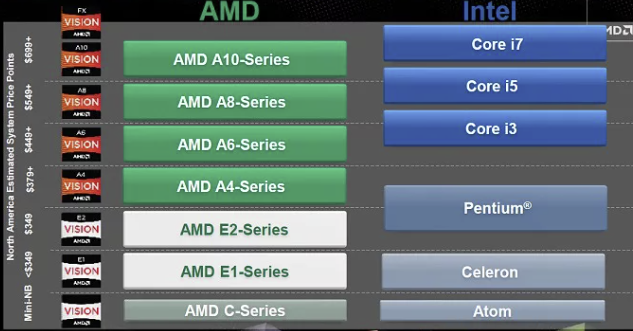

In [162]:
mapping6={'other CPU': 0,
'amd e1': 1,
'intel celeron dual-core': 1,
'intel celeron quad core' :1,
'intel celeron' :1,
'intel celeron ' :1,
'intel celeron quad core ':1,
'intel celeron m': 1 ,
'intel pentium dual-core': 2,
'intel pentium quad-core' :2,
'intel pentium quad-core ' :2,
'amd a4' :3,
'amd a6' :4,
'intel core i3': 5,
'amd a8' :6,
'intel core m': 7,
'intel core i5': 7,
'amd a10' :8,
'intel core i7': 9,
'amd a12' :10}

df['CPU model'] = df['CPU model'].replace(mapping6, regex=False)

In [163]:
df['CPU model'].unique()

array([ 9,  0,  5,  7,  1,  4,  2,  6,  3, 10,  8], dtype=int64)

In [164]:
df.head()

,graphic card type,resolution (px),CPU cores,RAM size,operating system,drive type,RAM type,CPU clock speed (GHz),CPU model,state,...,lte,wwan,keyboard,touchpad,numeric keyboard,illuminated keyboard,speakers,SD card reader,microphone,camera
0,1,3,4,32,0,4,2,2.6,9,new,...,0,0,1,1,1,1,1,1,1,1
1,1,1,4,8,4,3,0,2.4,9,new,...,0,0,1,1,1,0,1,1,1,1
2,0,7,4,8,4,3,2,1.2,0,new,...,0,0,1,1,0,1,1,1,1,1
3,0,1,2,8,4,1,2,2.0,5,new,...,0,0,1,1,1,0,1,1,1,1
4,1,3,4,8,3,1,0,2.4,9,new,...,0,0,1,1,1,1,1,1,1,1


We could drop the state column as it only have one value: new.

In [165]:
df['state'].unique()

array(['new'], dtype=object)

In [166]:
df.drop('state',inplace=True,axis=1)

Next, warranty.

In [167]:
df['warranty'].unique()

array(['producer warranty', 'seller warranty'], dtype=object)

In [168]:
mapeo = {'producer warranty': 1, 'seller warranty': 0}

df['warranty']= df['warranty'].map(mapeo)

In [169]:
df['screen size'].unique()

array(['17" - 17.9"', '15" - 15.9"', '12" - 12.9"', '14" - 14.9"',
       '13" - 13.9"', '11.9" and less'], dtype=object)

In [170]:
mapping7={'11.9" and less': 0,
'12" - 12.9"': 1,
'13" - 13.9"': 2,
'14" - 14.9"' :3,
'15" - 15.9"' :4,
'17" - 17.9"': 5}

df['screen size'] = df['screen size'].replace(mapping7, regex=False)

In [171]:
df['CPU cores']=df['CPU cores'].astype(int)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       6109 non-null   int64  
 1   resolution (px)         6109 non-null   int64  
 2   CPU cores               6109 non-null   int32  
 3   RAM size                6109 non-null   int32  
 4   operating system        6109 non-null   int64  
 5   drive type              6109 non-null   int64  
 6   RAM type                6109 non-null   int64  
 7   CPU clock speed (GHz)   6109 non-null   float64
 8   CPU model               6109 non-null   int64  
 9   drive memory size (GB)  6109 non-null   float64
 10  warranty                6109 non-null   int64  
 11  screen size             6109 non-null   int64  
 12  buynow_price            6109 non-null   float64
 13  bluetooth               6109 non-null   int64  
 14  wifi                    6109 non-null   

In [173]:
df.head()

,graphic card type,resolution (px),CPU cores,RAM size,operating system,drive type,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),...,lte,wwan,keyboard,touchpad,numeric keyboard,illuminated keyboard,speakers,SD card reader,microphone,camera
0,1,3,4,32,0,4,2,2.6,9,1250.0,...,0,0,1,1,1,1,1,1,1,1
1,1,1,4,8,4,3,0,2.4,9,256.0,...,0,0,1,1,1,0,1,1,1,1
2,0,7,4,8,4,3,2,1.2,0,256.0,...,0,0,1,1,0,1,1,1,1,1
3,0,1,2,8,4,1,2,2.0,5,1000.0,...,0,0,1,1,1,0,1,1,1,1
4,1,3,4,8,3,1,0,2.4,9,1000.0,...,0,0,1,1,1,1,1,1,1,1


The last step is to scale the column drive memory size. First, lets see if it follow a normal distribution, for use the standard scaler. if not, then we will use a minmax scaler:

(array([5.078e+03, 9.510e+02, 7.900e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   32. ,  1028.8,  2025.6,  3022.4,  4019.2,  5016. ,  6012.8,
         7009.6,  8006.4,  9003.2, 10000. ]),
 <BarContainer object of 10 artists>)

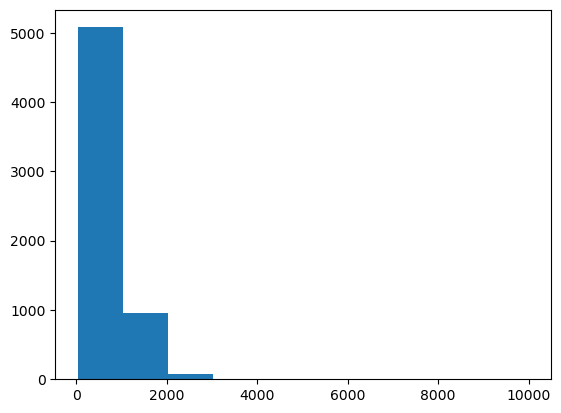

In [174]:
plt.hist(df['drive memory size (GB)']) 

As we can see, it doesnt follow a normal distribution, so we will use a minmaxscaler:

In [175]:
scaler = MinMaxScaler(feature_range=(0,2))

col = np.array(df['drive memory size (GB)']).reshape(-1, 1)


# Ajustar el escalador en los datos
scaler.fit(col)

# Transformar los valores de la columna
df['drive memory size (GB)'] = scaler.transform(col)
df.head()

,graphic card type,resolution (px),CPU cores,RAM size,operating system,drive type,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),...,lte,wwan,keyboard,touchpad,numeric keyboard,illuminated keyboard,speakers,SD card reader,microphone,camera
0,1,3,4,32,0,4,2,2.6,9,0.244382,...,0,0,1,1,1,1,1,1,1,1
1,1,1,4,8,4,3,0,2.4,9,0.044944,...,0,0,1,1,1,0,1,1,1,1
2,0,7,4,8,4,3,2,1.2,0,0.044944,...,0,0,1,1,0,1,1,1,1,1
3,0,1,2,8,4,1,2,2.0,5,0.194222,...,0,0,1,1,1,0,1,1,1,1
4,1,3,4,8,3,1,0,2.4,9,0.194222,...,0,0,1,1,1,1,1,1,1,1


In [176]:
col2 = np.array(df['RAM size']).reshape(-1, 1)
scaler.fit(col2)

df['RAM size'] = scaler.transform(col2)
df.head()

,graphic card type,resolution (px),CPU cores,RAM size,operating system,drive type,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),...,lte,wwan,keyboard,touchpad,numeric keyboard,illuminated keyboard,speakers,SD card reader,microphone,camera
0,1,3,4,2.0,0,4,2,2.6,9,0.244382,...,0,0,1,1,1,1,1,1,1,1
1,1,1,4,0.4,4,3,0,2.4,9,0.044944,...,0,0,1,1,1,0,1,1,1,1
2,0,7,4,0.4,4,3,2,1.2,0,0.044944,...,0,0,1,1,0,1,1,1,1,1
3,0,1,2,0.4,4,1,2,2.0,5,0.194222,...,0,0,1,1,1,0,1,1,1,1
4,1,3,4,0.4,3,1,0,2.4,9,0.194222,...,0,0,1,1,1,1,1,1,1,1


(array([5.078e+03, 9.510e+02, 7.900e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

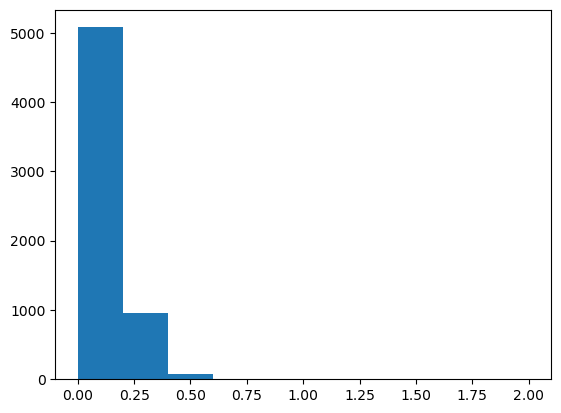

In [177]:
plt.hist(df['drive memory size (GB)']) 

In [178]:
df.to_csv('../clean_dataset_completo.csv', index=False)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       6109 non-null   int64  
 1   resolution (px)         6109 non-null   int64  
 2   CPU cores               6109 non-null   int32  
 3   RAM size                6109 non-null   float64
 4   operating system        6109 non-null   int64  
 5   drive type              6109 non-null   int64  
 6   RAM type                6109 non-null   int64  
 7   CPU clock speed (GHz)   6109 non-null   float64
 8   CPU model               6109 non-null   int64  
 9   drive memory size (GB)  6109 non-null   float64
 10  warranty                6109 non-null   int64  
 11  screen size             6109 non-null   int64  
 12  buynow_price            6109 non-null   float64
 13  bluetooth               6109 non-null   int64  
 14  wifi                    6109 non-null   